## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec

#### Notes:
When running Top2Vec with Doc2Vec on the unmodified (only the initial quote and bracket removed from directions; both reformatted into a list of strings) directions and ingredients columns the topics returned were somewhat messy with words like recipe and ingredient sprinkled throughout.

BERT returned far fewer topics on both columns.

Using the "clean" and preprocessed columns, BERT only returned two topics for the ingredients list.



In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small_heroclean.csv')

In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.head()

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...


In [33]:
df[df['clean_ingredients'].isna()]

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
10538,New Recipe Form Mac/Safari,"[""123456789 123456789 123456789 123456789 1234...","[""123456789 123456789 123456789 123456789 1234...",www.epicurious.com/recipes/member/views/new-re...,Gathered,[],NaN,NaN


In [11]:
documents = [x for x in df['clean_ingredients'] if type(x)==str]

In [12]:
documents

['["1 (7 oz.) jar Marshmallow Creme", "1 (8 oz.) pkg. cream cheese (Philadelphia)"]',
 '["1 1/2 lb. russet or Yukon gold potatoes, peeled and cut into 1-inch cubes", "1/2 cup low-fat milk or rice milk", "2 Tbs. butter or margarine", "23 tsp. wasabi paste", "1/2 cup chopped green onions, optional"]',
 '["2 (1 lb.) loaves frozen bread dough, thawed", "1 c. firmly packed brown sugar", "1 pkg. regular vanilla pudding and pie filling mix or 1 pkg. regular butterscotch pie filling mix", "1/2 c. butter or margarine, melted", "1/2 c. milk", "1/2 c. chopped nuts, divided (optional)", "1/2 c. raisins, divided"]',
 '["1/4 cup cream (half & half)", "12 large eggs", "1 tsp pepper", "1 tsp salt", "16 oz pork sausage"]',
 '["2 lb. lean ground beef", "1 small onion, chopped", "1 (16 oz.) can pintos, rinsed and drained", "1 (16 oz.) can kidney beans, rinsed and drained", "l (16 oz.) can lima beans, rinsed and drained", "1 (14 1/2 oz.) can hominy, drained", "3 (14 1/2 oz.) cans stewed tomatoes", "3 (4 o

In [16]:
model = Top2Vec(documents,  ngram_vocab=True)


2022-06-16 15:13:58,991 - top2vec - INFO - Pre-processing documents for training
2022-06-16 15:14:00,836 - top2vec - INFO - Creating joint document/word embedding
2022-06-16 15:14:37,378 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-16 15:14:43,791 - top2vec - INFO - Finding dense areas of documents
2022-06-16 15:14:44,297 - top2vec - INFO - Finding topics


In [17]:
model.get_num_topics()

230

In [18]:
model.get_topics()

(array([['hoisin', 'soy', 'sesame', ..., 'cabbage', 'thai bird', 'piece'],
        ['you', 'it', 'will', ..., 'make', 'amount', 'other'],
        ['salsa', 'picante', 'taco', ..., 'pace picante', 'kidney',
         'jar picante'],
        ...,
        ['don drain', 'do not', 'mandarin oranges', ..., 'lima beans',
         'boxes instant', 'each baker'],
        ['land lakes', 'land', 'lakes', ..., 'salmon fillet', 'soda',
         'applesauce'],
        ['deep dish', 'unbaked', 'pie shell', ..., 'vanilla',
         'full bodied', 'pastry shells']], dtype='<U22'),
 array([[0.7720291 , 0.76325285, 0.74404454, ..., 0.5416634 , 0.5410156 ,
         0.5385584 ],
        [0.79566133, 0.7472808 , 0.7431099 , ..., 0.5998915 , 0.5990399 ,
         0.59885657],
        [0.7240124 , 0.7128055 , 0.7087811 , ..., 0.48542035, 0.48293132,
         0.48196584],
        ...,
        [0.7701991 , 0.66136825, 0.6378087 , ..., 0.46751964, 0.4660289 ,
         0.46507508],
        [0.9285078 , 0.83207905, 

In [19]:
model.get_topic_sizes()

(array([447, 395, 390, 350, 290, 286, 258, 211, 207, 202, 198, 197, 195,
        193, 188, 183, 181, 181, 178, 170, 170, 164, 161, 157, 155, 150,
        149, 149, 147, 147, 146, 143, 141, 141, 139, 135, 134, 134, 131,
        130, 130, 128, 128, 127, 123, 123, 122, 120, 117, 117, 116, 114,
        113, 111, 110, 110, 110, 109, 108, 106, 106, 106, 105, 105, 104,
        103, 103, 103, 103, 102, 101, 101, 101, 100, 100, 100,  99,  98,
         98,  98,  97,  97,  97,  97,  97,  97,  96,  95,  95,  94,  94,
         94,  92,  92,  92,  91,  90,  90,  89,  89,  89,  89,  87,  86,
         86,  85,  85,  84,  84,  84,  83,  83,  83,  83,  82,  82,  81,
         81,  80,  79,  79,  79,  79,  78,  78,  78,  78,  78,  77,  76,
         76,  74,  73,  73,  73,  72,  72,  72,  72,  72,  72,  71,  71,
         70,  70,  70,  70,  68,  68,  68,  68,  68,  68,  68,  67,  67,
         67,  67,  66,  66,  66,  66,  65,  64,  64,  64,  63,  63,  62,
         62,  62,  62,  62,  61,  60,  59,  59,  59

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [20]:
vectors = model.document_vectors

In [21]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [22]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

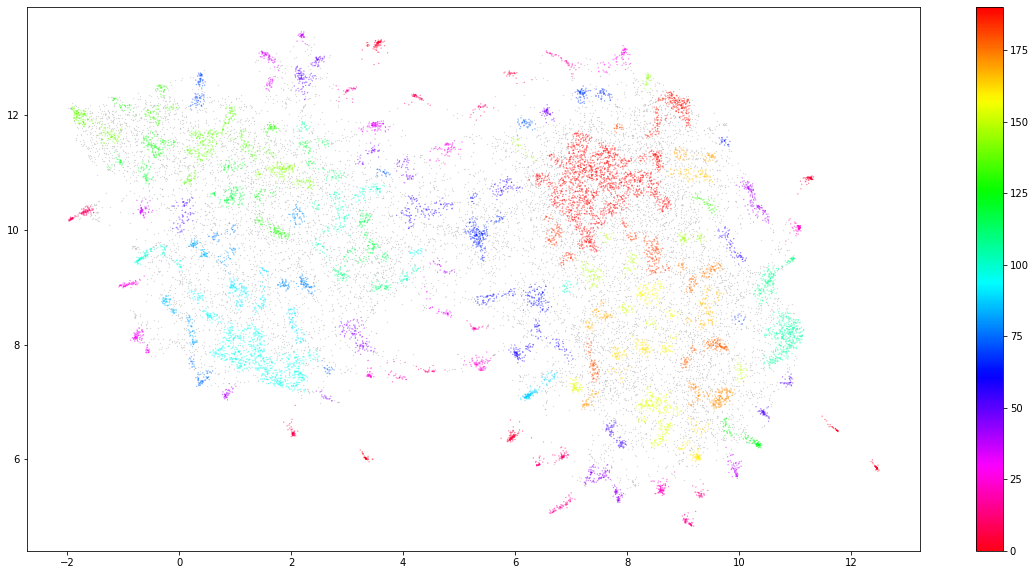

In [23]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [24]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [25]:
model.topic_words_reduced

array([['olive', 'leaves', 'virgin', 'black', 'and', 'extra', 'red',
        'cilantro', 'freshly', 'garlic', 'clove', 'fresh', 'plum', 'sea',
        'cracked', 'bunch', 'baby', 'thinly', 'leaf', 'oil', 'roma',
        'minced', 'kosher', 'cloves', 'about', 'shallots', 'flat',
        'sprigs', 'wedges', 'pound', 'shallot', 'removed', 'parsley',
        'pounds', 'drizzling', 'coarse', 'sliced', 'arugula', 'capers',
        'pepper', 'feta', 'cayenne', 'kalamata', 'handful', 'pressed',
        'seeded', 'stalks', 'chives', 'romaine', 'cleaned'],
       ['wafers', 'whipped', 'cool', 'pudding', 'fudge', 'whip', 'eagle',
        'pecans', 'graham', 'topping', 'jell', 'miniature', 'vanilla',
        'baker angel', 'oreo', 'boxes', 'butterscotch pudding',
        'marshmallows', 'sweetened whipped', 'whipped topping',
        'powdered', 'pie crust', 'chocolate', 'cracker', 'softened',
        'butterscotch', 'caramel', 'hershey', 'butterscotch chips',
        'box grater', 'filling', 'coo

In [32]:
model.topic_word_scores_reduced

array([[0.65400016, 0.64357245, 0.6430511 , 0.6365627 , 0.6319772 ,
        0.6234589 , 0.6187035 , 0.60998607, 0.60513914, 0.6009153 ,
        0.59123456, 0.5880622 , 0.5879829 , 0.58453125, 0.5803009 ,
        0.5759488 , 0.5724046 , 0.5707104 , 0.57053626, 0.5669534 ,
        0.56360245, 0.5560304 , 0.5407639 , 0.5402621 , 0.53686666,
        0.53441435, 0.5301211 , 0.528527  , 0.5283885 , 0.5283325 ,
        0.5276388 , 0.52655494, 0.5262363 , 0.5246583 , 0.5198008 ,
        0.5164312 , 0.51568556, 0.5119367 , 0.5099522 , 0.5088962 ,
        0.50868446, 0.5084374 , 0.5082421 , 0.50546   , 0.5048989 ,
        0.5045969 , 0.50425464, 0.50265276, 0.50185317, 0.49710223],
       [0.67489636, 0.67483884, 0.6676464 , 0.6579025 , 0.63212335,
        0.6186508 , 0.6145774 , 0.6054386 , 0.5999694 , 0.5994658 ,
        0.5931964 , 0.5808962 , 0.57244825, 0.56785405, 0.5652404 ,
        0.5632892 , 0.5574627 , 0.5546657 , 0.5534041 , 0.54937124,
        0.5478761 , 0.54355717, 0.5376996 , 0.5